# <center>Interpolación de Newton</center> #

El método de interpolación de Newton es una forma popular de ajustar un polinomio a un conjunto de puntos de datos de forma que el polinomio atraviese con exactitud dichos puntos. 

En general, si tenemos $n$ puntos, hay exactamente un polinomio de grado a lo sumo $n−1$ que pasa por todos los puntos de datos. Aunque solo existe un único polinomio que interpola una serie de puntos, existen diferentes formas de calcularlo. Una de ellas es mediante el método de Newton. 

La forma general de un polinomio de Newton de orden $n−1$ que pasa por $n$ puntos es:

$\quad f(x)=a_0+a_1(x−x_0)+a_2(x−x_0)(x−x_1)+⋯+a_n(x−x_0)(x−x_1)…(x−x_n)$

la cual se puede reescribir como:

$\quad P_n(x) = f(x) = a_0 + \sum _{j=0}^{n}a_jg_j(x)$

donde

$\quad g_j(x) =\prod _{i=0}^{j-1}(x-x_{i})$

La característica especial del polinomio de Newton es que los coeficientes $a_i$ se pueden determinar utilizando un procedimiento matemático muy simple. Por ejemplo, dado que el polinomio pasa por cada punto de datos, por lo tanto, para los puntos de datos $(x_i,y_i)$, tendremos $f(x_i)=y_i$, por lo que tenemos que:

$$ f(x_0)=a_0=y_0$$

Como $f(x_1)=a_0+a_1(x_1−x_0)=y_1$, entonces

$$ a_1=\frac{y_1−y_0}{x_1−x_0}$$

Utilizando el concepto de diferencias divididas, podemos definir:

$$ f[x_1,x_0]=\frac{y_1−y_0}{x_1−x_0} = a_1$$

$$ f[x_2,x_1,x_0] = \frac{f[x_2,x_1]-f[x_1,x_0]}{x_2-x_0} = \frac{\frac{y_2-y_1}{x_2-x_1} - \frac{y_1-y_0}{x_1-x_0}}{x_2-x_0} = a_2$$

$$ f[x_k,x_{k-1},\cdots,x_1,x_0] = \frac{f[x_k,x_{k-1},\cdots,x_1]-f[x_{k-1},\cdots,x_1,x_0]}{x_k-x_0} = a_k$$

Un aspecto importante de este método es que, una vez que se determinan los coeficientes, agregar nuevos puntos de datos no cambia los valores ya calculados, solo necesitamos calcular las diferencias superiores de la misma manera.

$\quad {\displaystyle {\begin{matrix}x_0, y_{0}&&&\\&f[x_1,x_0]&&\\x_1, y_{1}&&f[x_2,x_1,x_0]&\\&f[x_2,x_1]&&f[x_3,x_2,x_1,x_0]\\x_2, y_{2}&&f[x_3,x_2,x_1]&\\&f[x_3,x_2]&&\\x_3, y_{3}&&&\\\end{matrix}}}$

Cada elemento de la tabla se puede calcular utilizando los dos elementos anteriores (a la izquierda). Tenga en cuenta que solo necesitamos los elementos de la parte superior, los cuales constituyen los coeficientes del polinomio.


Ejemplo: Utilizando los polinomios de interpolación de Newton, encuentra el polinomio de interpolación de los datos: $(1,1),(2,5)$.

Tenemos dos puntos de datos, por lo tanto, crearemos un polinomio de primer grado. Por lo tanto:

$$  b_1=y_1=1\qquad b_2=\frac{5-1}{2-1}=4  $$

Por tanto, el polinomio de interpolación tiene la forma:

$$ y=1+4(x-1)=1+4x-4=-3+4x $$

Por ejemplo, supongamos que vamos a construir el polinomio de interpolación a $f(x) = tan(x)$ usando diferencias divididas, en los puntos


 $$n$$	| $$x_{n}$$	        | $$f(x_n)$$
 ------| -------------------|----------
 0     | $$-\tfrac {3}{2}$$	| −14.1014 
 1     | $$-\tfrac {3}{4}$$	| -0.931596 
 2     | 0                  | 0 
 3     | $$\tfrac {3}{4}$$	| 0.931596
 4     | $$\tfrac {3}{2}$$	| 14.1014
  
Utilizando seis dígitos de precisión, construimos la tabla


$${\begin{matrix}-{\tfrac  {3}{2}}&-14.1014&&&&\\&&17.5597&&&\\-{\tfrac  {3}{4}}&-0.931596&&-10.8784&&\\&&1.24213&&4.83484&\\0&0&&0&&0\\&&1.24213&&4.83484&\\{\tfrac  {3}{4}}&0.931596&&10.8784&&\\&&17.5597&&&\\{\tfrac  {3}{2}}&14.1014&&&&\\\end{matrix}}$$

Y obtenemos el polinomio de interpolación

${\displaystyle {\begin{aligned}&-14.1014+17.5597(x+{\tfrac {3}{2}})-10.8784(x+{\tfrac {3}{2}})(x+{\tfrac {3}{4}})+4.83484(x+{\tfrac {3}{2}})(x+{\tfrac {3}{4}})(x)+0(x+{\tfrac {3}{2}})(x+{\tfrac {3}{4}})(x)(x-{\tfrac {3}{4}})\\={}&-0.00005-1.4775x-0.00001x^{2}+4.83484x^{3}\end{aligned}}}
$

Utilizando mayor precisión, el primer y el tercer coeficientes se convierten en ceros.

Veamos un ejemplo de cómo podemos hacerlo. Calcule la tabla de diferencias divididas para $x = [-5, -1, 0, 2]$, $y = [-2, 6, 1, 3].$

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')

%matplotlib inline

In [9]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

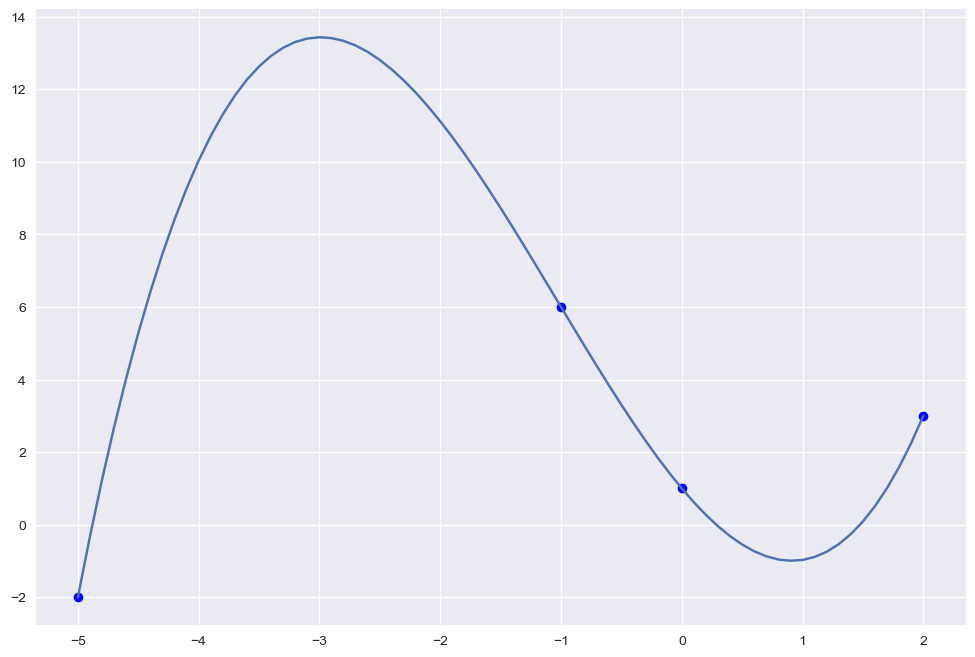

In [10]:
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)

Podemos ver que el polinomio de Newton pasa por todos los puntos de datos y ajusta los datos.

### <center>Bibliografía</center> ###


* [Interpolación polinómica de Newton](https://es.wikipedia.org/wiki/Interpolaci%C3%B3n_polin%C3%B3mica_de_Newton)

* [Newton Interpolating Polynomials](https://engcourses-uofa.ca/books/numericalanalysis/polynomial-interpolation/newton-interpolating-polynomials/)

* [Newton’s Polynomial Interpolation](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.05-Newtons-Polynomial-Interpolation.html)

* [Diferencias divididas e interpolación](https://minerva.usc.es/xmlui/bitstream/handle/10347/26330/Garc%C3%ADa_Hermida_Elba.pdf?sequence=1)

* [Divided differences](https://en.wikipedia.org/wiki/Divided_differences)

* [Newton polynomial](https://en.wikipedia.org/wiki/Newton_polynomial)

* [Teoría Combinatoria](https://www.unirioja.es/talleres/creatividad_matematica/SeminarioBachillerato/COMBINATORIA.pdf)

